<a href="https://colab.research.google.com/github/Akhror7/PredictiveModelling_ProsperLoan/blob/main/choosing_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/Akhror7/PredictiveModelling_ProsperLoan/main/cleaned_data_prosperLoan.csv')

In [106]:
df.shape

(106221, 58)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106221 entries, 0 to 106220
Data columns (total 58 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          106221 non-null  int64  
 1   Term                                106221 non-null  int64  
 2   LoanStatus                          106220 non-null  float64
 3   BorrowerAPR                         106221 non-null  float64
 4   LenderYield                         106221 non-null  float64
 5   EstimatedEffectiveYield             106221 non-null  float64
 6   EstimatedLoss                       106221 non-null  float64
 7   EstimatedReturn                     106221 non-null  float64
 8   ProsperRating (numeric)             106221 non-null  float64
 9   ListingCategory (numeric)           106221 non-null  int64  
 10  BorrowerState                       106221 non-null  object 
 11  Occupation                

In [108]:
df.dropna(inplace=True)

In [109]:
df[['BorrowerState','Occupation','EmploymentStatus','IncomeRange']]

,BorrowerState,Occupation,EmploymentStatus,IncomeRange
0,CO,Other,Self-employed,"$25,000-49,999"
1,CO,Professional,Employed,"$50,000-74,999"
2,GA,Other,Not available,Not displayed
3,GA,Skilled Labor,Employed,"$25,000-49,999"
4,MN,Executive,Employed,"$100,000+"
...,...,...,...,...
106216,IL,Food Service Management,Employed,"$50,000-74,999"
106217,PA,Professional,Employed,"$75,000-99,999"
106218,TX,Other,Employed,"$25,000-49,999"
106219,GA,Food Service,Full-time,"$25,000-49,999"


In [110]:
df[['BorrowerState','Occupation','EmploymentStatus','IncomeRange']].nunique()

BorrowerState       51
Occupation          67
EmploymentStatus     8
IncomeRange          8
dtype: int64

In [111]:
Employment_mapping = {
           'Employed':8,
           'Other': 3,
           'Full-time': 8,
            'Self-employed': 6,
            'Retired': 2,
            'Part-time': 4,
            'Not employed':2,
             'Not available':1 }           
df['EmploymentStatus'] = df['EmploymentStatus'].map(Employment_mapping)

In [112]:
income_mapping = {
           '$0':0,
           'Not employed': 0,
           '$1-24,999': 1,
            '$25,000-49,999': 2,
            '$50,000-74,999': 3,
            '$75,000-99,999': 4,
            '$100,000+':5,
            'Not displayed':0 }           

df['IncomeRange'] = df['IncomeRange'].map(income_mapping)

In [113]:
df.drop(['BorrowerState','Occupation'], axis=1,inplace=True)

In [114]:
df.corrwith(df['LoanStatus'])

Unnamed: 0                           -0.003656
Term                                  0.102033
LoanStatus                            1.000000
BorrowerAPR                          -0.198308
LenderYield                          -0.231300
EstimatedEffectiveYield              -0.165435
EstimatedLoss                        -0.162508
EstimatedReturn                      -0.191105
ProsperRating (numeric)               0.212679
ListingCategory (numeric)             0.035891
EmploymentStatus                      0.162724
EmploymentStatusDuration              0.058885
IsBorrowerHomeowner                   0.040614
CurrentlyInGroup                     -0.185108
CreditScoreRangeLower                 0.251241
CreditScoreRangeUpper                 0.251241
CurrentCreditLines                    0.071062
OpenCreditLines                       0.086223
TotalCreditLinespast7years            0.046151
OpenRevolvingAccounts                 0.109148
OpenRevolvingMonthlyPayment           0.064592
InquiriesLast

In [115]:
X = df.drop('LoanStatus',axis=1)
y = df['LoanStatus']

In [116]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[2.03864583e-03 1.91303283e-03 6.20081784e-03 8.56625723e-03
 5.35519927e-03 3.17714162e-03 4.87641241e-03 8.07874575e-03
 2.89183249e-03 5.32381001e-03 2.04179696e-03 1.38434407e-03
 7.22265656e-03 5.32701625e-03 6.18748301e-03 2.11875727e-03
 2.12828547e-03 2.04607940e-03 3.00734933e-03 2.22156875e-03
 3.73228358e-03 3.54560212e-03 2.37205570e-03 1.22900249e-03
 1.64731966e-03 1.47565812e-03 3.77833984e-04 2.10671002e-03
 2.28700972e-03 2.20133353e-03 2.02014408e-03 2.47837879e-03
 2.01485771e-03 2.07359883e-03 4.48327274e-03 7.34837484e-04
 2.01121446e-03 3.60964172e-01 3.53040428e-02 2.18043886e-02
 6.34937431e-03 5.03357288e-03 1.56847005e-02 2.63726555e-02
 3.93501127e-03 5.06480915e-03 1.96397160e-02 1.58354001e-01
 2.08238621e-01 1.05089791e-02 3.22479532e-04 3.04441638e-04
 1.64379306e-04 1.74348664e-04 2.88196176e-03]


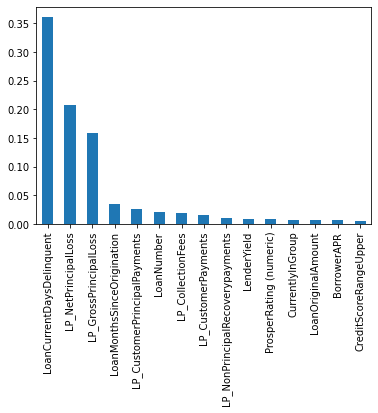

In [117]:
f_t = pd.Series(model.feature_importances_,index=X.columns)
f_t.nlargest(15).plot(kind='bar')
plt.show()

In [118]:
df_model = df[['LoanCurrentDaysDelinquent','LP_NetPrincipalLoss','LP_GrossPrincipalLoss','LoanMonthsSinceOrigination','LP_CustomerPrincipalPayments','ProsperRating (numeric)','LP_CollectionFees','LenderYield','BorrowerAPR','LoanStatus']]

In [120]:
df_model.describe()

,LoanCurrentDaysDelinquent,LP_NetPrincipalLoss,LP_GrossPrincipalLoss,LoanMonthsSinceOrigination,LP_CustomerPrincipalPayments,ProsperRating (numeric),LP_CollectionFees,LenderYield,BorrowerAPR,LoanStatus
count,106220.000000,106220.000000,106220.000000,106220.000000,106220.000000,106220.000000,106220.000000,106220.000000,106220.000000,106220.000000
mean,138.164009,662.810299,681.665815,28.880606,3079.629993,4.080394,-13.995641,0.183423,0.220435,0.838260
std,436.885505,2346.102598,2377.683989,27.429582,4057.312795,1.708091,110.112249,0.075151,0.080996,0.368214
min,0.000000,-954.550000,-94.200000,0.000000,0.000000,1.000000,-9274.750000,-0.010000,0.006530,0.000000
25%,0.000000,0.000000,0.000000,6.000000,493.890000,3.000000,0.000000,0.124375,0.157130,1.000000
50%,0.000000,0.000000,0.000000,19.000000,1547.120000,4.000000,0.000000,0.174000,0.211500,1.000000
75%,0.000000,0.000000,0.000000,46.000000,4000.000000,5.000000,0.000000,0.242400,0.287040,1.000000
max,2599.000000,25000.000000,25000.000000,92.000000,35000.000000,7.000000,0.000000,0.340000,0.423950,1.000000
